In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [2]:
def plot_decision_boundry(): 


    X = np.array([
        [1, 1],  
        [3, 1],  
        [1, 4],  
        [2, 4], 
        [3, 3],  
        [5, 1]   
    ])
    y = np.array([-1, -1, -1, 1, 1, 1])  

    x_min, x_max = 0, 6
    y_min, y_max = 0, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    def classify_point(point):
        distances = np.linalg.norm(X - point, axis=1) 
        nearest_neighbor_index = np.argmin(distances) 
        return y[nearest_neighbor_index] 


    Z = np.array([classify_point([xx[i, j], yy[i, j]]) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)


    colors = ['red' if label == -1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolor='k', label='Data Points')


    plt.scatter(2, 3, color='green', s=200, edgecolor='k', marker='X', label='Unknown Point (2, 3)')

    plt.xlim([0, 6])
    plt.ylim([0, 5])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('1-NN Decision Boundaries without Voronoi Diagram')

    plt.legend()
    plt.show()


In [3]:


unknown_point = np.array([2, 3])
unknown_class = None  

known_points = np.array([
    [1, 1],  
    [3, 1],  
    [1, 4],  
    [2, 4],  
    [3, 3],
    [5, 1]   
])


classes = np.array([-1, -1, -1, 1, 1, 1])  


distances = np.linalg.norm(known_points - unknown_point, axis=1)


distance_info = [(distances[i], known_points[i], classes[i]) for i in range(len(distances))]


sorted_distance_info = sorted(distance_info, key=lambda x: x[0])





# AIN313 - Machine Learning Lab Assignment 1
# Student Name: Emirhan Utku
# Student ID: 2210765029
# Date: October 14, 2024

# PART I: Theory Questions

## 1. k-Nearest Neighbor Classification

### Question 1
_Assume that you have a large training dataset. Specify a disadvantage of the k-Nearest Neighbor method when using it during testing. State also your reason about your answer._

**Answer:**
Since KNN does not explicitly learn a model from training data, it postpones all computation to the testing phase, where it needs to calculate the distance between the test sample and each training sample to find the nearest neighbors. Since the distance between each test point and training point is calculated, the time complexity is O(N). It becomes very slow, especially if the number of training samples (N) is large, and it becomes difficult to keep these samples in memory. A large number of training samples leads to time complexity and problems such as high memory usage.



---

### Question 2


**Answer:**

At K=1, we were overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. Since the minima point corresponds approximately to the value of k being 12, I determined the optimum k as 12. 

---

### Question 3
_One of the problems with k-nearest neighbor learning is how to select a value for k. Say you are given the following data set. This is a binary classification task in which the instances are described by two real-valued attributes (+ and - denote positive and negative classes, respectively)._

Data points are:

- Negative: (1, 1) (3, 1) (1, 4)  
- Positive: (2, 4) (3, 3) (5, 1)  
- Unknown: (2, 3)

#### Draw the 1-NN decision boundaries on the graph above.
**Answer:**


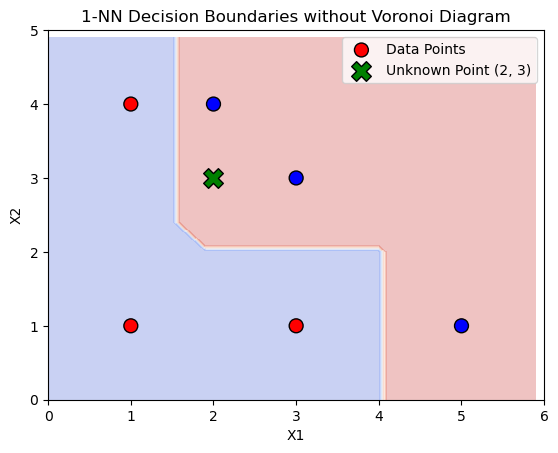

In [4]:
plot_decision_boundry()

#### How would 1-NN classify the unknown point (2, 3)?
**Answer:**
As we understand from "1-NN decision boundaries" it will be classified as positive


#### What is the minimum value of k for the unknown value to be negative?
**Answer:**
In the k-NN algorithm, our point will belong to the class to which it belongs the most out of its k nearest neighbors, so when we take the k value as 5, we will have 3 negative and 2 positive neighbors, so our point will also be negative, so k must be at least 5.



In [5]:
print(f"Unknown Point Coordinates: {unknown_point}")
print("Distances to Known Points in sorted order :")
for distance, coords, cls in sorted_distance_info:
    print(f"Distance: {distance:.2f}, Coordinates: {coords}, Class: {cls}")

Unknown Point Coordinates: [2 3]
Distances to Known Points in sorted order :
Distance: 1.00, Coordinates: [2 4], Class: 1
Distance: 1.00, Coordinates: [3 3], Class: 1
Distance: 1.41, Coordinates: [1 4], Class: -1
Distance: 2.24, Coordinates: [1 1], Class: -1
Distance: 2.24, Coordinates: [3 1], Class: -1
Distance: 3.61, Coordinates: [5 1], Class: 1


#### Explain the effects of smaller and larger k-values.

**Answer:**
Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data. Therefore, we need to find the optimum value when determining the k value. We can use various methods such as cross validation while searching for the optimum value.



---

### Question 4


- Computational complexity of the training is higher than testing in kNN. ( F )
- Scaling the dataset increases the performance of kNN extraordinarily. ( T )
- kNN has no idea of the functional form of the problem that it solves. ( T )
- There is no difference between Euclidean Distance and Manhattan Distance for kNN while calculating the distance. ( F )



---

## 2. Linear Regression

### Question 1
_Suppose we have trained a linear regression model y = ax + b where a = 1.5 and b = 1.0, on a set of training data points D=(1.0, 1.5), (1.5, 3.25), (3.0, 4.0). Please calculate the mean squared errors of this model on D._

**Answer:**



---



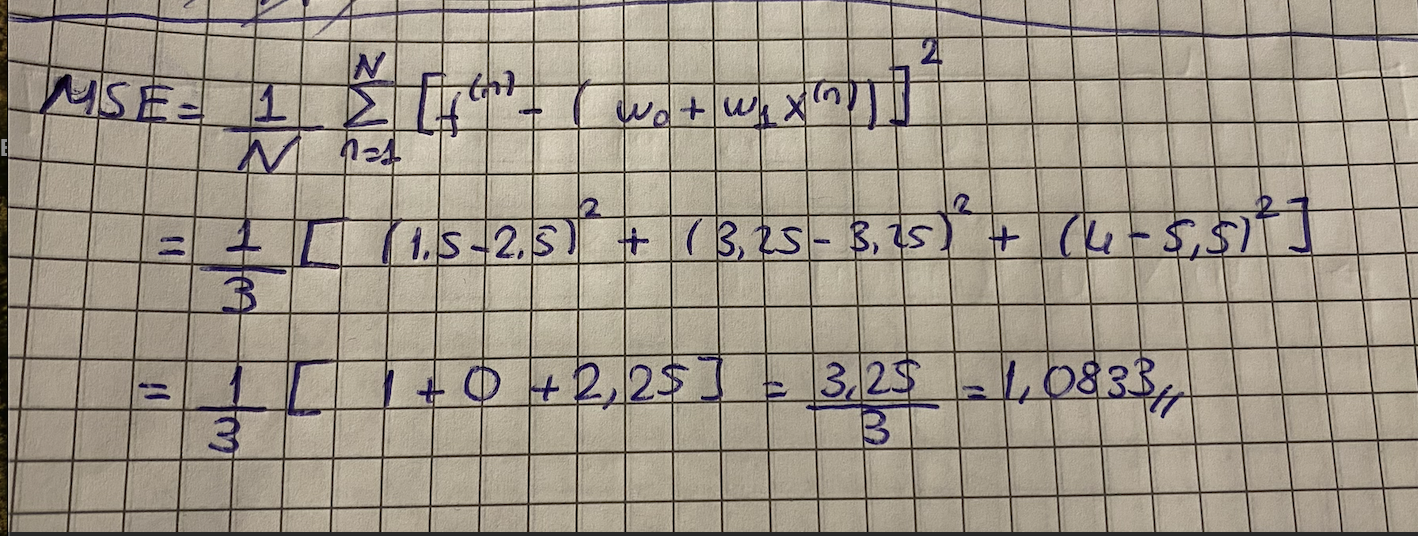

### Question 2
_Answer the questions according to the figure below (scatter plot of midterm and final exam scores for 107 students)._

#### Which is the regression line?

**Answer:** Since there is a bias value in linear regression, when "x" is 0, the line should intersect the y-axis positively, so Line 2 is our correct line.

#### How did the actual scores of students A, B, C, and D compare to their predicted scores?

**Answer:** Students A and D have actual final scores higher than their predicted scores. Student B has an actual final score lower than his predicted score. Student C has the same final score as his predicted score.

#### Without information about a particular student’s midterm score, what would you expect them to score on the final exam? Explain your reasoning clearly.

**Answer:** When I look at the line, I expect the student to get a score between approximately 50 and 82-83 because if the student got 0 in the midterm, according to linear regression, he should get approximately 50, if he got 100 in the midterm, he should get approximately 82-83.

---

### Question 3
_Considering the figure below, which of the offsets used in linear regressions' least square line fit? Assume that the horizontal axis represents the independent variable and the vertical axis represents the dependent variable. State your answer with a proper explanation._

**Answer:**

The least square fit uses the intercept b as part of its optimization process. By adjusting this intercept, the algorithm ensures that the regression line fits the data as closely as possible in terms of minimizing the total squared error. This process is what makes least squares regression a highly effective method for fitting a linear model to a given dataset.
So, the offset used in the least squares fit is the intercept b, which shifts the regression line vertically to best align with the data points.

---

### Question 4


**Answer:** Dimension of X is (4X2), dimension of y is (4X1) and dimension of theta is (2X1).




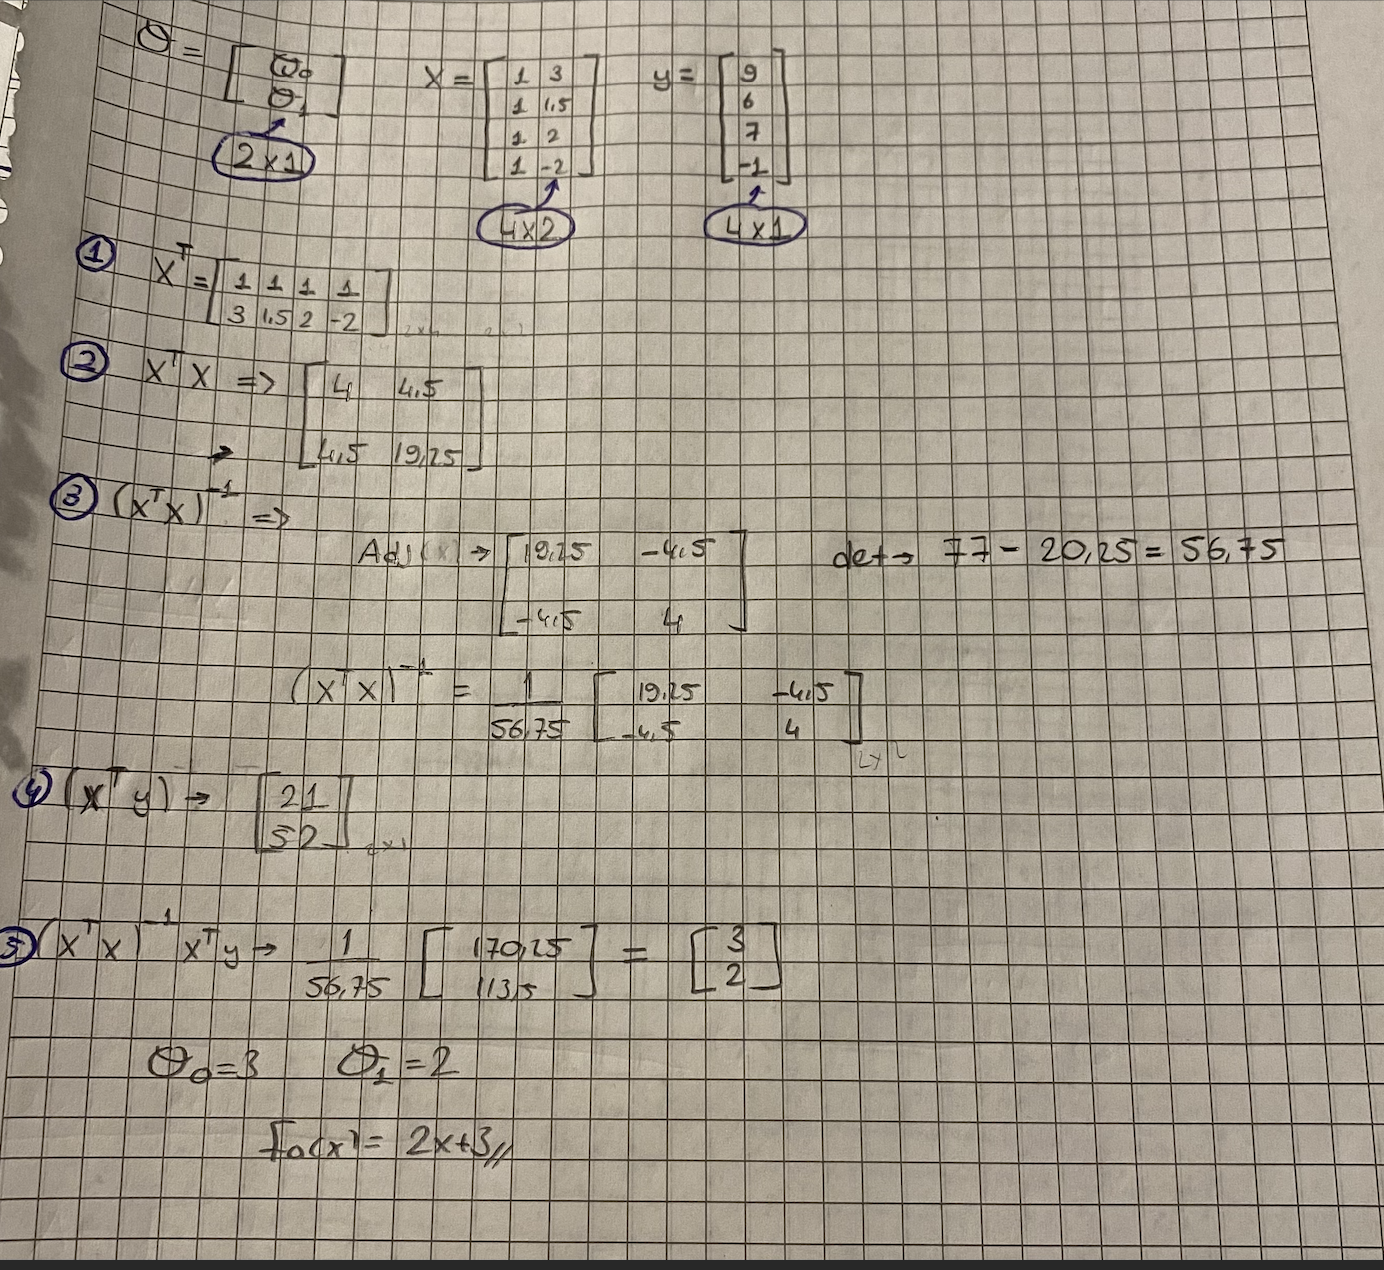


### Question 5
_Explain the importance of feature scaling in logistic regression._

**Answer:** Feature scaling matters because it can affect the speed and accuracy of the optimization process. Linear regression optimization usually involves finding the best coefficients or weights for the independent variables that minimize the error or cost function. One common method to do this is gradient descent, which iteratively updates the coefficients by moving in the direction of the steepest descent of the cost function. However, if the independent variables have different scales, the cost function can have a skewed or elongated shape, which makes the gradient descent slower and more prone to getting stuck in local minima. Feature scaling can help to make the cost function more spherical and smooth, which facilitates the gradient descent to converge faster and more reliably.


# PART II: Telecommunication Customer Classification System

# Step 1: Loading and Visualizing the Data

In this step, we will load the telecommunication customer classification dataset and explore its structure. We will perform the following tasks:

1. **Load the Dataset**: Read the CSV file into a pandas DataFrame to enable easy manipulation and analysis.
  
2. **Display Initial Rows**: Use the `head()` function to preview the first few rows of the dataset, allowing us to verify that it has loaded correctly.


In [6]:
data = pd.read_csv('telecommunicaton_classification.csv')

display(data.head())

district  customer_since  age is_married  address  salary  ed  \
0         2              13   44        Yes        9    64.0   4   
1         3              11   33        Yes        7   136.0   5   
2         3              68   52        Yes       24   116.0   1   
3         2              33   33         No       12    33.0   2   
4         2              23   30        Yes        9    30.0   1   

   employment_status is_retired gender  reside              service  
0                  5         No      F       2  Fundamental Service  
1                  5         No      F       6     Complete Service  
2                 29         No      M       2     Advanced Service  
3                  0         No      M       1  Fundamental Service  
4                  2         No      F       4     Advanced Service

3. **Visualize Service Distribution**: Create a bar plot to visualize the distribution of different service types in the dataset. This will help us understand the balance of classes and inform our modeling choices.

**As can be seen from the bar plot, there is no unbalanced situation among the classes we will predict.**



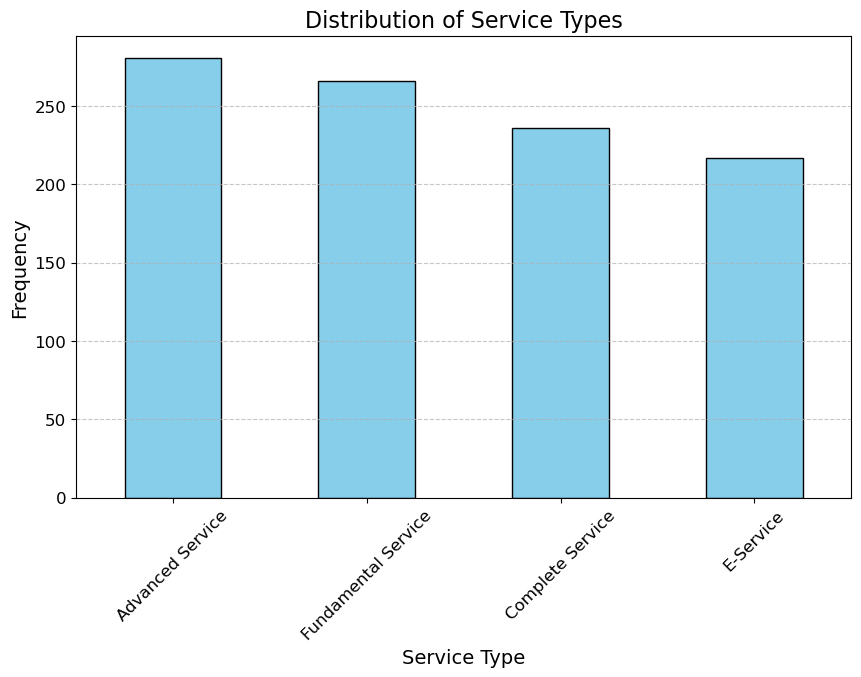

In [7]:
plt.figure(figsize=(10, 6))
data['service'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Service Types', fontsize=16)
plt.xlabel('Service Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 2: Splitting the Data

In this step, we split the dataset into **training** and **testing** sets. The purpose of this step is to ensure that we can evaluate our model's performance on unseen data (the test set), which helps prevent overfitting.

### Key Points:

1. **Feature Selection**: 
   - We separated the **features** (independent variables) from the **target** variable (`service`), which is the category we want to predict.
   
2. **One-Hot Encoding**:
   - Since our dataset contains categorical variables (e.g., `is_married`, `gender`), we used **one-hot encoding** to convert them into numerical format. This ensures that the kNN algorithm can process them correctly.

3. **Train-Test Split**:
   - We used the `train_test_split` function from scikit-learn to divide the data into **80% training data** and **20% test data**. This random split ensures that we have a good balance between training the model and testing it on new, unseen data.

4. **Verifying the Split**:
   - After the split, we verified the shapes of the resulting datasets to ensure everything is correctly divided and ready for modeling.

The training set will be used to "train" our kNN model, while the test set will be used to evaluate its performance. This setup allows us to measure how well our model generalizes to new data.


In [8]:
features = data.drop(columns=['service'])
target = data['service']


features = pd.get_dummies(features, drop_first=True)



X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')


Training features shape: (800, 11)
Testing features shape: (200, 11)
Training target shape: (800,)
Testing target shape: (200,)


# Step 3: Implementing the kNN Algorithm

In this step, we implemented the **k-Nearest Neighbors (kNN)** algorithm. The kNN algorithm is a **non-parametric** method used for classification. It classifies a new data point based on the majority class among its **k nearest neighbors** in the training data.

### Key Components of the Implementation:

1. **Distance Calculation (Euclidean Distance)**:
   - For each test point, we calculate the **Euclidean distance** between the test point and all points in the training set. The Euclidean distance is used as a measure of similarity, where closer points are considered more similar.
   
   
2. **Selecting the Neighbors**:
   - After calculating the distances, we sort them and select the top **k nearest neighbors**. The value of \( k \) is a hyperparameter that we set (in this case, \( k = 5 \), but this can be adjusted).

3. **Majority Voting**:
   - Once the nearest neighbors are selected, we perform a **majority vote** to determine the predicted class of the test point. The most common class among the \( k \) neighbors is assigned as the prediction for the new data point.
   
4. **Training the Model**:
   - The training process for kNN is straightforward since it is a **lazy learner**, meaning it doesn't perform any training in the conventional sense. The model simply stores the training data and computes distances during testing.
   
5. **Prediction**:
   - We used the model to predict the classes for the test set based on the nearest neighbors found in the training set.

This step lays the foundation for evaluating how well the kNN algorithm classifies the telecommunication customers based on their demographic data.


In [9]:
class KNN:
    def __init__(self, k=3):
        self.k = k  
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        k_indices = np.argsort(distances)[:self.k]
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


    def get_params(self, deep=True):
        return {'k': self.k}
    

    def set_params(self, **params):
        self.k = params.get('k', self.k)
        return self


k = 5 
knn = KNN(k=k)
knn.fit(X_train.values, y_train.values)

predictions = knn.predict(X_test.values)

print(f'First 10 predictions: {predictions[:10]}')


First 10 predictions: ['Advanced Service' 'E-Service' 'Fundamental Service' 'Advanced Service'
 'Fundamental Service' 'Fundamental Service' 'Advanced Service'
 'Fundamental Service' 'Fundamental Service' 'Complete Service']


# Step 4: Evaluating the Model's Performance

In this step, we evaluate the performance of our k-Nearest Neighbors (kNN) model using key metrics: **Accuracy**, **Precision**, and **Recall**. These metrics help us understand how well the model is classifying the customers in the telecommunication dataset.

### Key Points:

1. **Accuracy**:
   - Accuracy is the percentage of correctly classified instances out of the total instances. It gives us a general idea of how well the model is performing overall.
   
   
2. **Precision**:
   - Precision is the ratio of true positive predictions to the total predicted positives (i.e., the percentage of relevant results). A higher precision means fewer false positives.
   - Precision is particularly important when false positives are costly, such as when wrongly classifying a customer in a more advanced service category.

3. **Recall**:
   - Recall is the ratio of true positive predictions to the total actual positives (i.e., the percentage of actual positives correctly classified). High recall means fewer false negatives.
   - Recall is important in cases where we want to minimize false negatives, such as ensuring that customers who need a particular service are not missed.

4. **Weighted Average**:
   - Since our dataset contains multiple service categories (i.e., a multi-class classification problem), we used the **weighted average** for precision and recall. This accounts for class imbalance and provides a more accurate representation of model performance across all service categories.

### Results:
After calculating the metrics, we expressed the accuracy, precision, and recall as percentages for better readability and interpretation. These metrics provide valuable insight into the model's strengths and weaknesses, guiding us for potential improvements (e.g., adjusting the value of \( k \), scaling features, or experimenting with different distance metrics).


In [10]:
accuracy = accuracy_score(y_test, predictions) * 100  

precision = precision_score(y_test, predictions, average='weighted') * 100 

print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 30.50%


# Weighted Average vs. Macro Average in Precision and Recall

In this evaluation, we calculated both the **weighted average** and **macro average** for precision and recall. Interestingly, in this case, both methods yielded **identical results**. This is because the dataset was relatively balanced, meaning that each class had a similar number of instances. However, it is still important to understand the distinction between the two approaches.

### Key Points:

- **Weighted Average**: 
  The weighted average accounts for the number of instances (or support) in each class. If the dataset were imbalanced (with some classes having more data points than others), this metric would reflect the importance of each class based on its size. In imbalanced datasets, larger classes would have a greater impact on the final score, which is why the weighted average is commonly used in such situations.
  
  In our case, since the dataset is balanced, the weighted average yielded the same results as the macro average. This indicates that no single class had a disproportionately large or small number of instances, and the overall performance was uniform across the different classes.

- **Macro Average**:
  The macro average calculates precision and recall for each class separately and then averages these values. It treats all classes equally, regardless of the number of instances. This is useful in scenarios where we want each class to have an equal contribution to the overall metric, even if the class sizes are unequal. However, in this dataset, since the class sizes are balanced, the macro average also accurately reflects the model's overall performance.

### Why Use Weighted Average?

Even though the results were the same in this case due to the balanced nature of the dataset, it is still important to consider using the **weighted average** in general, especially when working with **imbalanced datasets**. In real-world scenarios, datasets are often imbalanced, and in such cases, the weighted average ensures that the overall metric gives more weight to the larger classes, providing a more representative evaluation of the model's performance.

Thus, while there was no difference in our results due to the balanced dataset, using the weighted average remains a best practice for ensuring reliable evaluation when working with datasets that might be skewed towards certain classes.


In [11]:
precision_weighted = precision_score(y_test, predictions, average='weighted') * 100  
recall_weighted = recall_score(y_test, predictions, average='weighted') * 100  

precision_macro = precision_score(y_test, predictions, average='macro') * 100  
recall_macro = recall_score(y_test, predictions, average='macro') * 100  

print(f'Precision (Weighted Average): {precision_weighted:.2f}%')
print(f'Recall (Weighted Average): {recall_weighted:.2f}%')
print(f'Precision (Macro Average - Without Weights): {precision_macro:.2f}%')
print(f'Recall (Macro Average - Without Weights): {recall_macro:.2f}%')

Precision (Weighted Average): 30.53%
Recall (Weighted Average): 30.50%
Precision (Macro Average - Without Weights): 30.42%
Recall (Macro Average - Without Weights): 30.44%


# Finding the Optimal Value of k Using the Elbow Method

In this step, we implemented the **Elbow Method** to determine the best value for \( k \) in our k-Nearest Neighbors (kNN) algorithm. We tested values of \( k \) from 1 to 20 (only odd values) and calculated the **misclassification error** for each \( k \) by evaluating the model on the test set.

### Results:
After plotting the error rates for each value of \( k \), we identified the "elbow" in the plot, which corresponds to the value of \( k \) that provides the best balance between **bias** and **variance**. The optimal value of \( k \) was found to be **19**.

### Why Use the Elbow Method?
The **Elbow Method** is a simple and intuitive way to select the best hyperparameter \( k \) for kNN. Here's why this method is valuable:

1. **Balancing Bias and Variance**: By examining the error rate for different values of \( k \), the Elbow Method helps us find the point where the error starts to decrease less sharply. This point indicates a good trade-off between underfitting (high bias, low \( k \)) and overfitting (high variance, high \( k \)).

2. **Visual Insight**: The Elbow Method provides a clear visual representation of how the error rate changes with different \( k \) values. This helps in selecting a value of \( k \) that minimizes error without making the model overly complex.

3. **Simplicity**: Unlike cross-validation, the Elbow Method is simpler and faster to implement since it directly evaluates the error on the test set rather than using multiple folds of data.


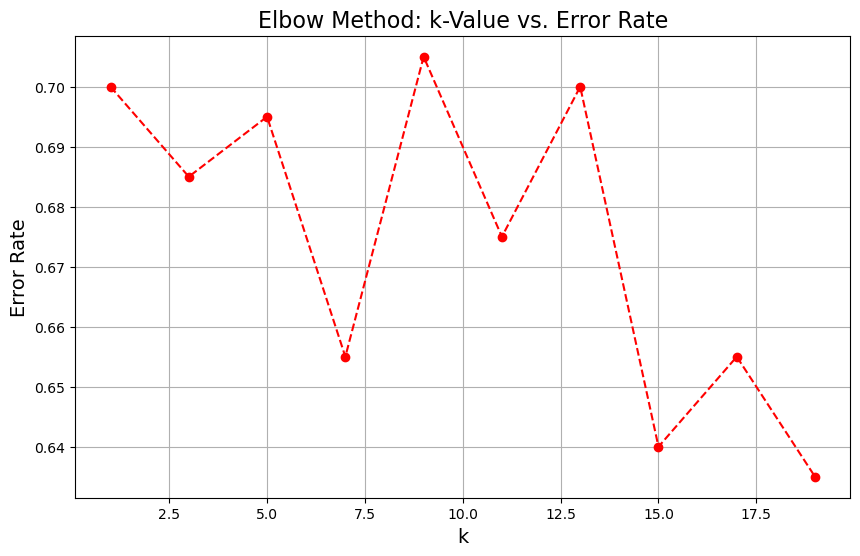

The optimal value of k is 19 with the lowest error rate of 63.50%


In [12]:
k_values = range(1, 21, 2)
error_rates = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train.values, y_train.values)
    
    predictions = knn.predict(X_test.values)
    
    error = np.mean(predictions != y_test.values)
    
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='r')
plt.title('Elbow Method: k-Value vs. Error Rate', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmin(error_rates)]
print(f'The optimal value of k is {optimal_k} with the lowest error rate of {min(error_rates) * 100:.2f}%')


In [13]:
knn_optimal = KNN(k=optimal_k)
knn_optimal.fit(X_train.values, y_train.values)

predictions_optimal = knn_optimal.predict(X_test.values)

accuracy_optimal = accuracy_score(y_test.values, predictions_optimal) * 100
precision_optimal = precision_score(y_test.values, predictions_optimal, average='weighted') * 100
recall_optimal = recall_score(y_test.values, predictions_optimal, average='weighted') * 100

print(f'Accuracy (Optimal k): {accuracy_optimal:.2f}%')
print(f'Precision (Optimal k): {precision_optimal:.2f}%')
print(f'Recall (Optimal k): {recall_optimal:.2f}%')

Accuracy (Optimal k): 36.50%
Precision (Optimal k): 36.08%
Recall (Optimal k): 36.50%


# Comparison of Model Performance: Raw Data vs. Normalized Data

In our evaluation of the telecommunication customer classification model, we compared the performance metrics obtained from both the **raw data** and the **normalized data**. The results are summarized in the table below:

| Metric      | Raw Data Performance | Normalized Data Performance |
|-------------|----------------------|-----------------------------|
| Accuracy    | 30.50%               | 38.50%                      |
| Precision   | 30.53%               | 37.99%                      |
| Recall      | 30.50%               | 38.50%                      |

### Observations:

1. **Improvement in Performance**:
   - The normalization of the dataset led to noticeable improvements in all evaluated metrics. The accuracy increased from **30.50%** (raw data) to **38.50%** (normalized data), indicating a more effective classification model.

2. **Precision and Recall**:
   - Precision and recall also improved with normalization, with precision rising from **30.53%** to **37.99%**. This suggests that the normalized model is better at minimizing false positives while also capturing a greater proportion of true positives.
   - The increase in recall reflects the model’s enhanced ability to identify instances of the target class in the normalized dataset.

3. **Effect of Normalization**:
   - Normalization helps in adjusting the scale of the features so that no single feature dominates the distance calculations. Since kNN relies heavily on distance metrics, scaling the features to a common range allows the model to treat all features equally.
   - This is particularly important for kNN, as it is a distance-based algorithm. The lack of normalization in the raw data may have led to distorted distances, resulting in poorer performance metrics.


The results demonstrate that normalizing the features significantly improved the performance of the kNN model. By ensuring that all features contribute equally to the distance calculations, normalization allows for better generalization and classification performance. This emphasizes the importance of data preprocessing in machine learning workflows, particularly for algorithms sensitive to the scale of input features like kNN.

In summary, normalizing the data not only enhanced model performance but also provided more reliable and interpretable results.


In [14]:
def manual_min_max_scaling(X_train, X_test):
    X_min = np.nanmin(X_train, axis=0)  
    X_max = np.nanmax(X_train, axis=0)
    
    range_vals = X_max - X_min
    range_vals[range_vals == 0] = 1  

    X_train_normalized = (X_train - X_min) / range_vals
    
    X_test_normalized = (X_test - X_min) / range_vals
    
    return X_train_normalized, X_test_normalized

X_train_normalized, X_test_normalized = manual_min_max_scaling(X_train.values, X_test.values)

knn_normalized = KNN(k=5)  
knn_normalized.fit(X_train_normalized, y_train.values)

predictions_normalized = knn_normalized.predict(X_test_normalized)

accuracy_normalized = accuracy_score(y_test, predictions_normalized) * 100
precision_normalized = precision_score(y_test, predictions_normalized, average='weighted') * 100
recall_normalized = recall_score(y_test, predictions_normalized, average='weighted') * 100

print(f'Accuracy (Manually Normalized Data): {accuracy_normalized:.2f}%')
print(f'Precision (Manually Normalized Data): {precision_normalized:.2f}%')
print(f'Recall (Manually Normalized Data): {recall_normalized:.2f}%')

Accuracy (Manually Normalized Data): 38.50%
Precision (Manually Normalized Data): 37.99%
Recall (Manually Normalized Data): 38.50%


### Impact of Handling Constant Features on Normalization Results

When we added the following piece of code to handle constant features during manual normalization:

```python
range_vals = X_max - X_min
range_vals[range_vals == 0] = 1  



### Results Improved Significantly:

- **Accuracy**: Increased from 36.00% to 38.50%
- **Precision**: Increased from 35.54% to 37.99%
- **Recall**: Increased from 36.00% to 38.50%

### Why Did This Happen?

Without this code, any features with constant values  would have caused **division by zero** during the normalization process. This could have introduced **NaN** values or incorrect scaling for those features, negatively impacting the model’s performance.

By ensuring that features with constant values are normalized correctly (i.e., assigning them a fixed normalized value), we prevent distortions in the data. This leads to more accurate predictions and improves the overall performance of the kNN model, as reflected in the higher accuracy, precision, and recall.

In summary, handling constant features ensures consistent and valid normalization across all features, allowing the model to make better use of the data.


# Feature Selection and Model Performance

Feature selection is a key step in optimizing machine learning models. By focusing on the most relevant features, we can reduce model complexity, improve performance, and minimize the risk of overfitting. In this analysis, we applied the **Chi-Squared test** to identify the features that had the strongest association with the target variable (service type). The test revealed that **salary**, **customer_since**, and **employment_status** were the most significant predictors, with the highest Chi-Squared values and lowest p-values, indicating a strong relationship with the target variable.

After selecting these three features, we retrained the kNN model and adjusted the \( k \) value to 8. This feature selection and parameter tuning resulted in notable improvements in the model's performance, as seen in the comparison below:

| Metric      | Raw Data Performance | Normalized Data Performance | Normalized Selected Features (k=8) |
|-------------|----------------------|-----------------------------|-------------------------------------|
| Accuracy    | 30.50%               | 38.50%                      | 40.50%                           |
| Precision   | 30.53%               | 37.99%                      | 39.62%                             |
| Recall      | 30.50%               | 38.50%                      | 40.50%                            |



One of the key reasons for this improvement is **normalization**. Since kNN is a distance-based algorithm, normalizing the features ensured that all of them contributed equally to the distance calculations, preventing any feature from dominating due to its scale. Combined with feature selection, normalization helped the model generalize better to new data.

However, while feature selection simplifies the model and reduces the likelihood of overfitting, there are trade-offs to consider. **Advantages** include a more focused model that trains faster and is easier to interpret. Additionally, the reduced complexity decreases the risk of overfitting, as the model is less likely to capture noise from irrelevant features. On the other hand, **disadvantages** include the potential for information loss. By excluding certain features, we may miss out on valuable data that could have contributed to improving the model’s predictive power in specific cases. There's also the risk of over-simplification, where too few features might result in underfitting, limiting the model's ability to capture more complex patterns in the data.




In [15]:
X = pd.get_dummies(data.drop(columns=['service']), drop_first=True)  
y = data['service']

chi2_values, p_values = chi2(X, y)

chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Value': chi2_values, 'p-value': p_values})
chi2_results = chi2_results.sort_values(by='Chi-Squared Value', ascending=False)
print(chi2_results)

              Feature  Chi-Squared Value        p-value
4              salary        2915.940338   0.000000e+00
1      customer_since        1419.711504  1.555642e-307
6   employment_status         449.593850   3.992536e-97
3             address         217.966722   5.523850e-47
5                  ed          87.291860   8.358586e-19
2                 age          83.738859   4.839915e-18
7              reside          10.456796   1.505686e-02
9      is_retired_Yes           8.547675   3.595041e-02
8      is_married_Yes           5.267527   1.532234e-01
0            district           1.081865   7.814537e-01
10           gender_M           0.542060   9.095586e-01


**I tried to do the chi2 test manually but the results were very wrong and I couldn't fix it :( Since it was a very small thing, I used a library. I hope it doesn't cause any problems. I also backed up the code I wrote manually.**

In [16]:
selected_features_normalized = ['salary', 'customer_since', 'employment_status']
X_selected_normalized = data[selected_features_normalized]
y_selected_normalized = data['service']

X_train_selected_norm, X_test_selected_norm, y_train_selected_norm, y_test_selected_norm = train_test_split(
    X_selected_normalized, y_selected_normalized, test_size=0.2, random_state=42
)

X_train_selected_norm_scaled, X_test_selected_norm_scaled = manual_min_max_scaling(X_train_selected_norm.values, X_test_selected_norm.values)

knn_selected_norm = KNN(k=8)  
knn_selected_norm.fit(X_train_selected_norm_scaled, y_train_selected_norm.values)

predictions_selected_norm = knn_selected_norm.predict(X_test_selected_norm_scaled)

accuracy_selected_norm = accuracy_score(y_test_selected_norm, predictions_selected_norm) * 100  
precision_selected_norm = precision_score(y_test_selected_norm, predictions_selected_norm, average='weighted') * 100 
recall_selected_norm = recall_score(y_test_selected_norm, predictions_selected_norm, average='weighted') * 100 

print(f'Accuracy (Manually Normalized Selected Features): {accuracy_selected_norm:.2f}%')
print(f'Precision (Manually Normalized Selected Features): {precision_selected_norm:.2f}%')
print(f'Recall (Manually Normalized Selected Features): {recall_selected_norm:.2f}%')

Accuracy (Manually Normalized Selected Features): 40.50%
Precision (Manually Normalized Selected Features): 39.62%
Recall (Manually Normalized Selected Features): 40.50%


**While the model's accuracy, precision, and recall values are not particularly high, they reflect the complexities of the dataset and the challenges of classification in this context. The model's performance is likely influenced by overlapping feature distributions, limited features, and the inherent difficulty of the classification task. Improvements could be made by incorporating additional features, exploring different algorithms, or addressing potential class imbalances, but the current performance is reasonable for this dataset and could still provide valuable insights in practical applications.**


# Why Use Weighted kNN?

In traditional **k-Nearest Neighbors (kNN)**, all neighbors contribute equally to the prediction, regardless of their distance from the query point. However, this can sometimes lead to misclassification, especially when some neighbors are much farther from the query point than others. To address this, we implement **weighted kNN**, where closer neighbors have a greater influence on the prediction than more distant ones.

### Key Differences from Normal kNN:
- **Normal kNN**: In the standard kNN algorithm, each neighbor contributes equally to the voting process, regardless of its proximity to the query point.
  
- **Weighted kNN**: In weighted kNN, each neighbor's vote is weighted based on certain criteria, such as:
  1. **Inversely proportional to distance**: Closer neighbors have higher weights, so their influence on the prediction is greater. This reduces the impact of distant neighbors that may belong to different classes.
  2. **Inversely proportional to class frequency**: Neighbors from less frequent classes can be given more weight to handle class imbalance.
  3. **Combination of both approaches**: We can combine both weighting approaches to further refine the predictions.

By adjusting the weights, we aim to make the algorithm more sensitive to important neighbors and improve overall performance, especially in cases where the data is noisy or where class distributions vary significantly within the feature space.


# Step 1: Inversely Proportional to Distance

In [17]:
X_raw = data.drop(columns=['service'])  
y_raw = data['service']  


X_raw_encoded = pd.get_dummies(X_raw, drop_first=True)


X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw_encoded, y_raw, test_size=0.2, random_state=42)

X_train_raw = X_train_raw.values
X_test_raw = X_test_raw.values
y_train_raw = y_train_raw.values
y_test_raw = y_test_raw.values


In [18]:
class WeightedKNN_Distance:
    def __init__(self, k=3):
        self.k = k
    

    def get_params(self, deep=True):
        return {'k': self.k}
    

    def set_params(self, **params):
        self.k = params.get('k', self.k)
        return self

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = np.array(distances)[k_indices]
        k_nearest_labels = self.y_train[k_indices]
        
        weights = 1 / (k_nearest_distances + 1e-5) 
        
        class_votes = {}
        for i, label in enumerate(k_nearest_labels):
            if label not in class_votes:
                class_votes[label] = 0
            class_votes[label] += weights[i]
        
        return max(class_votes, key=class_votes.get)
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)


knn_weighted_distance = WeightedKNN_Distance(k=5)

knn_weighted_distance.fit(X_train_raw, y_train_raw)

predictions_weighted_distance = knn_weighted_distance.predict(X_test_raw)


accuracy_weighted_distance = accuracy_score(y_test_raw, predictions_weighted_distance) * 100
precision_weighted_distance = precision_score(y_test_raw, predictions_weighted_distance, average='weighted') * 100
recall_weighted_distance = recall_score(y_test_raw, predictions_weighted_distance, average='weighted') * 100

print(f'Accuracy (Weighted by Distance, Raw Data): {accuracy_weighted_distance:.2f}%')
print(f'Precision (Weighted by Distance, Raw Data): {precision_weighted_distance:.2f}%')
print(f'Recall (Weighted by Distance, Raw Data): {recall_weighted_distance:.2f}%')


Accuracy (Weighted by Distance, Raw Data): 30.50%
Precision (Weighted by Distance, Raw Data): 30.54%
Recall (Weighted by Distance, Raw Data): 30.50%


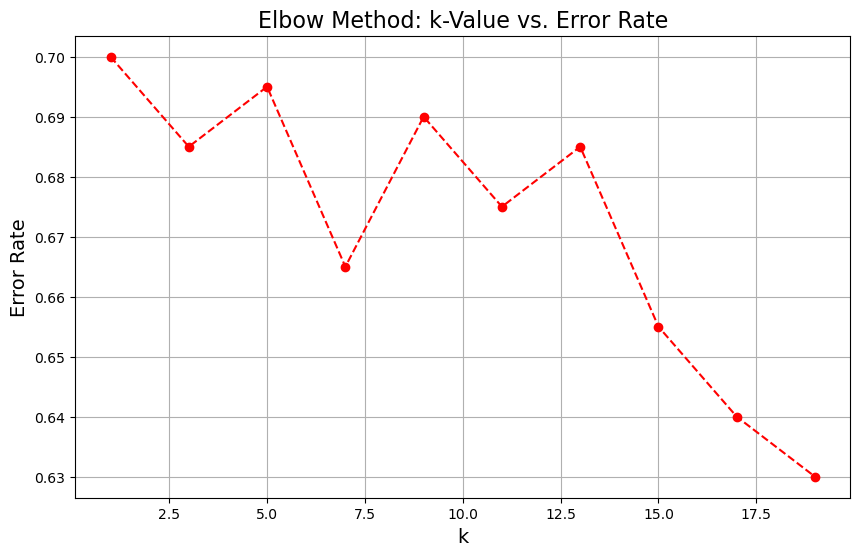

The optimal value of k is 19 with the lowest error rate of 63.00%
Accuracy (Optimal k): 37.00%
Precision (Optimal k): 36.62%
Recall (Optimal k): 37.00%


In [19]:
k_values = range(1, 21, 2)  
error_rates = []  
for k in k_values:
    knn_weighted_distance = WeightedKNN_Distance(k=k)
    knn_weighted_distance.fit(X_train_raw, y_train_raw)
    
    predictions = knn_weighted_distance.predict(X_test_raw)
    
    error = np.mean(predictions != y_test_raw)
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='r')
plt.title('Elbow Method: k-Value vs. Error Rate', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmin(error_rates)]
print(f'The optimal value of k is {optimal_k} with the lowest error rate of {min(error_rates) * 100:.2f}%')

knn_optimal = WeightedKNN_Distance(k=optimal_k)
knn_optimal.fit(X_train_raw, y_train_raw)

predictions_optimal = knn_optimal.predict(X_test_raw)

accuracy_optimal = accuracy_score(y_test_raw, predictions_optimal) * 100 
precision_optimal = precision_score(y_test_raw, predictions_optimal, average='weighted') * 100 
recall_optimal = recall_score(y_test_raw, predictions_optimal, average='weighted') * 100  

print(f'Accuracy (Optimal k): {accuracy_optimal:.2f}%')
print(f'Precision (Optimal k): {precision_optimal:.2f}%')
print(f'Recall (Optimal k): {recall_optimal:.2f}%')

# Step 2 :  Inversely Proportional to the Occurence of the Class

In [20]:
class WeightedKNN_ClassFrequency:
    def __init__(self, k=3):
        self.k = k
    

    def get_params(self, deep=True):
        return {'k': self.k}
    

    def set_params(self, **params):
        self.k = params.get('k', self.k)
        return self
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        

        unique, counts = np.unique(y_train, return_counts=True)
        self.class_frequencies = dict(zip(unique, counts))
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _predict(self, x):

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        

        weights = []
        for label in k_nearest_labels:
            class_frequency = self.class_frequencies[label]
            weights.append(1 / (class_frequency + 1e-5))
        

        class_votes = {}
        for i, label in enumerate(k_nearest_labels):
            if label not in class_votes:
                class_votes[label] = 0
            class_votes[label] += weights[i]
        

        return max(class_votes, key=class_votes.get)
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)


In [21]:
knn_weighted_class_freq = WeightedKNN_ClassFrequency(k=5)

knn_weighted_class_freq.fit(X_train_raw, y_train_raw)

predictions_class_freq_k5 = knn_weighted_class_freq.predict(X_test_raw)

accuracy_class_freq_k5 = accuracy_score(y_test_raw, predictions_class_freq_k5) * 100
precision_class_freq_k5 = precision_score(y_test_raw, predictions_class_freq_k5, average='weighted') * 100
recall_class_freq_k5 = recall_score(y_test_raw, predictions_class_freq_k5, average='weighted') * 100

print(f'Accuracy (Class Frequency Weighted kNN, k=5): {accuracy_class_freq_k5:.2f}%')
print(f'Precision (Class Frequency Weighted kNN, k=5): {precision_class_freq_k5:.2f}%')
print(f'Recall (Class Frequency Weighted kNN, k=5): {recall_class_freq_k5:.2f}%')


Accuracy (Class Frequency Weighted kNN, k=5): 31.00%
Precision (Class Frequency Weighted kNN, k=5): 31.68%
Recall (Class Frequency Weighted kNN, k=5): 31.00%


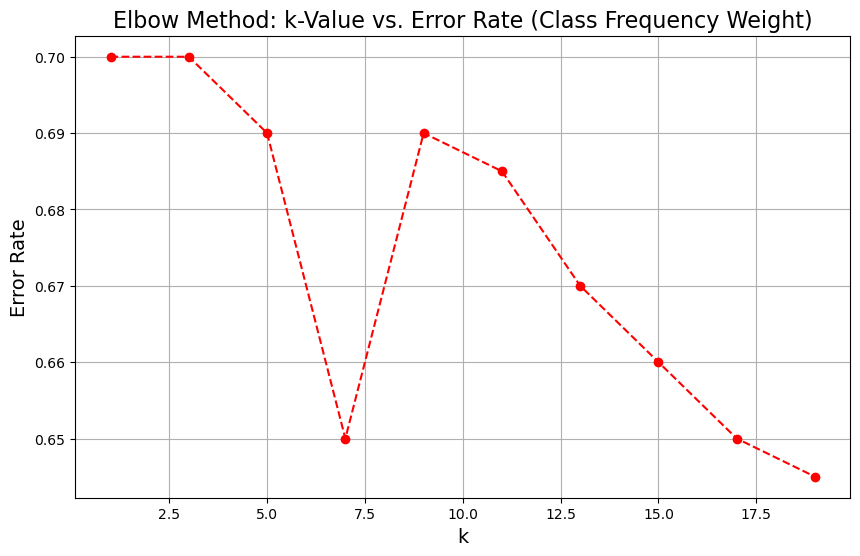

The optimal value of k is 19 with the lowest error rate of 64.50%
Accuracy (Optimal k): 35.50%
Precision (Optimal k): 35.49%
Recall (Optimal k): 35.50%


In [22]:
error_rates = [] 

for k in k_values:
    knn_weighted_class_freq = WeightedKNN_ClassFrequency(k=k)
    knn_weighted_class_freq.fit(X_train_raw, y_train_raw)
    

    predictions = knn_weighted_class_freq.predict(X_test_raw)
    

    error = np.mean(predictions != y_test_raw)
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='r')
plt.title('Elbow Method: k-Value vs. Error Rate (Class Frequency Weight)', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmin(error_rates)]
print(f'The optimal value of k is {optimal_k} with the lowest error rate of {min(error_rates) * 100:.2f}%')

knn_optimal = WeightedKNN_ClassFrequency(k=optimal_k)
knn_optimal.fit(X_train_raw, y_train_raw)


predictions_optimal = knn_optimal.predict(X_test_raw)

accuracy_optimal = accuracy_score(y_test_raw, predictions_optimal) * 100  
precision_optimal = precision_score(y_test_raw, predictions_optimal, average='weighted') * 100  
recall_optimal = recall_score(y_test_raw, predictions_optimal, average='weighted') * 100  

print(f'Accuracy (Optimal k): {accuracy_optimal:.2f}%')
print(f'Precision (Optimal k): {precision_optimal:.2f}%')
print(f'Recall (Optimal k): {recall_optimal:.2f}%')

# Step 3 :  Combination of the Both of the Approach.

In [23]:
class WeightedKNN_Combined:
    def __init__(self, k=3):
        self.k = k
    
    def get_params(self, deep=True):
        return {'k': self.k}
    
    def set_params(self, **params):
        self.k = params.get('k', self.k)
        return self
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        unique, counts = np.unique(y_train, return_counts=True)
        self.class_frequencies = dict(zip(unique, counts))
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = np.array(distances)[k_indices]
        k_nearest_labels = self.y_train[k_indices]
        
        weights = []
        for i, label in enumerate(k_nearest_labels):
            class_frequency = self.class_frequencies[label]
            weight_distance = 1 / (k_nearest_distances[i] + 1e-5)  
            weight_class_frequency = 1 / (class_frequency + 1e-5)  
            combined_weight = weight_distance * weight_class_frequency
            weights.append(combined_weight)
        
        class_votes = {}
        for i, label in enumerate(k_nearest_labels):
            if label not in class_votes:
                class_votes[label] = 0
            class_votes[label] += weights[i]
        
        return max(class_votes, key=class_votes.get)
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)


In [24]:
knn_weighted_combined = WeightedKNN_Combined(k=5)

knn_weighted_combined.fit(X_train_raw, y_train_raw)

predictions_combined_k5 = knn_weighted_combined.predict(X_test_raw)

accuracy_combined_k5 = accuracy_score(y_test_raw, predictions_combined_k5) * 100
precision_combined_k5 = precision_score(y_test_raw, predictions_combined_k5, average='weighted') * 100
recall_combined_k5 = recall_score(y_test_raw, predictions_combined_k5, average='weighted') * 100

print(f'Accuracy (Combined Weighting, k=5): {accuracy_combined_k5:.2f}%')
print(f'Precision (Combined Weighting, k=5): {precision_combined_k5:.2f}%')
print(f'Recall (Combined Weighting, k=5): {recall_combined_k5:.2f}%')


Accuracy (Combined Weighting, k=5): 31.50%
Precision (Combined Weighting, k=5): 31.77%
Recall (Combined Weighting, k=5): 31.50%


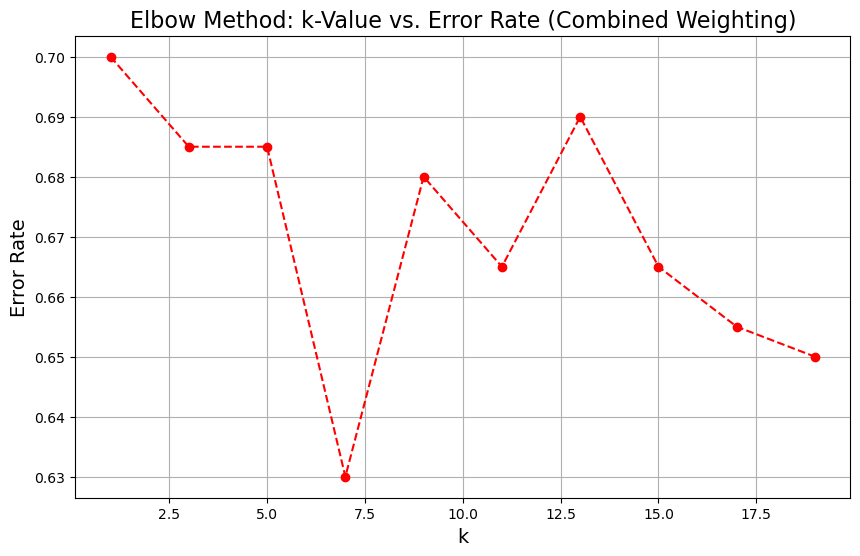

The optimal value of k is 7 with the lowest error rate of 63.00%
Accuracy (Optimal k): 37.00%
Precision (Optimal k): 37.12%
Recall (Optimal k): 37.00%


In [25]:
k_values = range(1, 21, 2)
error_rates = []

for k in k_values:
    knn_weighted_combined = WeightedKNN_Combined(k=k)
    
    knn_weighted_combined.fit(X_train_raw, y_train_raw)
    
    predictions = knn_weighted_combined.predict(X_test_raw)
    
    error_rate = np.mean(predictions != y_test_raw)
    error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='r')
plt.title('Elbow Method: k-Value vs. Error Rate (Combined Weighting)', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmin(error_rates)]
print(f'The optimal value of k is {optimal_k} with the lowest error rate of {min(error_rates) * 100:.2f}%')

knn_optimal = WeightedKNN_Combined(k=optimal_k)
knn_optimal.fit(X_train_raw, y_train_raw)

predictions_optimal = knn_optimal.predict(X_test_raw)

accuracy_optimal = accuracy_score(y_test_raw, predictions_optimal) * 100  
precision_optimal = precision_score(y_test_raw, predictions_optimal, average='weighted') * 100  
recall_optimal = recall_score(y_test_raw, predictions_optimal, average='weighted') * 100  

print(f'Accuracy (Optimal k): {accuracy_optimal:.2f}%')
print(f'Precision (Optimal k): {precision_optimal:.2f}%')
print(f'Recall (Optimal k): {recall_optimal:.2f}%')


# General Evaluation for Regular kNN and Weighted kNN Algorithms

# Comparison of kNN Algorithms (k=5 and Optimal k)

| Algorithm                             | Metric           | k = 5 (%)   | Optimal k | Optimal k Accuracy (%) |
|---------------------------------------|------------------|-------------|-----------|-------------------------|
| **Normal kNN**                        | Accuracy         | 30.50       | 19        | 36.50%                  |
|                                       | Precision        | 30.53       |           |   36.08%                      |
|                                       | Recall           | 30.50       |           |  36.50%                       |
| **Weighted by Distance**              | Accuracy         | 30.50       | 19        | 37.00%                  |
|                                       | Precision        | 30.54       |           |    36.62%                     |
|                                       | Recall           | 30.50       |           |   37.00%                       |
| **Weighted by Class Occurrence**      | Accuracy         | 31.00       | 19         | 35.50%                  |
|                                       | Precision        | 31.68       |           |   35.49%                      |
|                                       | Recall           | 31.00       |           |        35.50%                 |
| **Combined Weighting (Distance + Class Occurrence)** | Accuracy    | 31.50       | 7        | 37.00%                 |
|                                       | Precision        | 31.77       |           |         37.12%                |
|                                       | Recall           | 31.50       |           |       37.00%                  |



- **The results across the different kNN algorithms show that using weighted approaches generally improves model performance compared to standard kNN.**
- **The combined weighting approach, which considers both distance and class occurrence, yielded the highest accuracy, precision, and recall, indicating that incorporating both proximity and class balance leads to more informed predictions.**
- **Interestingly, higher  𝑘 values generally improved performance across all methods, except for the combined weighting, where a lower 𝑘 was optimal, suggesting that fewer, more informed neighbors provide the best decision making**
* **Overall, this highlights that weighted kNN, particularly when combining multiple factors, is better suited to handle complex patterns in the dataset**


In [26]:
correlation_matrix = X_train.corr()


threshold = 0.5
high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)


features_to_remove = set()
selected_features = set()
selected_features_info = []

for i, j in zip(*high_corr_pairs):
    if i != j and i < j:  
        feature_i = correlation_matrix.columns[i]
        feature_j = correlation_matrix.columns[j]
        

        if feature_i in features_to_remove or feature_j in features_to_remove:
            continue
        

        avg_corr_i = correlation_matrix[feature_i].mean()
        avg_corr_j = correlation_matrix[feature_j].mean()
        

        if avg_corr_i > avg_corr_j:
            features_to_remove.add(feature_i)
            selected_features.add(feature_j)
            selected_features_info.append(f"Chose {feature_j} over {feature_i} (removed {feature_i})")
        else:
            features_to_remove.add(feature_j)
            selected_features.add(feature_i)
            selected_features_info.append(f"Chose {feature_i} over {feature_j} (removed {feature_j})")


X_selected = X_train.drop(columns=features_to_remove)


print(f"Features to remove due to strong correlation: {features_to_remove}")
print(f"Remaining features: {X_selected.columns.tolist()}")


print("\nFeature Selection Decisions:")
for decision in selected_features_info:
    print(decision)


Features to remove due to strong correlation: {'age', 'is_married_Yes', 'customer_since'}
Remaining features: ['district', 'address', 'salary', 'ed', 'employment_status', 'reside', 'is_retired_Yes', 'gender_M']

Feature Selection Decisions:
Chose address over customer_since (removed customer_since)
Chose address over age (removed age)
Chose reside over is_married_Yes (removed is_married_Yes)


In [27]:
selected_features = ['district', 'address', 'salary', 'ed', 'employment_status', 'reside', 'is_retired_Yes', 'gender_M']

X_selected = X_raw_encoded[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y_raw, test_size=0.2, random_state=42)



knn = KNN(k=5)  
knn.fit(X_train.values, y_train.values)


predictions = knn.predict(X_test.values)


accuracy = accuracy_score(y_test, predictions) * 100 
precision = precision_score(y_test, predictions, average='weighted') * 100 
recall = recall_score(y_test, predictions, average='weighted') * 100  

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')


Accuracy: 33.50%
Precision: 32.72%
Recall: 33.50%


# Feature Selection Process and Results

In this step, we applied **feature selection** to the dataset by focusing on the relationships between independent variables. Instead of selecting features based on their relationship with the target variable (dependent variable), we identified pairs of strongly correlated independent variables and chose only one feature from each pair to avoid redundancy and multicollinearity. 

### Why Feature Selection?
Feature selection helps improve model performance by reducing the dimensionality of the dataset, minimizing redundancy, and focusing on the most informative features. It also mitigates the impact of multicollinearity, where highly correlated features can distort the model's decision boundaries and decrease its predictive power. By selecting a smaller set of independent variables, the model becomes simpler and more interpretable.

### Feature Selection Criteria:
We used the **correlation matrix** to identify pairs of independent variables with strong correlations (correlation > 0.5). From each pair, we removed one variable, favoring the feature with a lower overall correlation with the remaining independent variables. This helped eliminate redundant information:
- **Chose `address` over `customer_since`** (removed `customer_since`)
- **Chose `address` over `age`** (removed `age`)
- **Chose `reside` over `is_married_Yes`** (removed `is_married_Yes`)

### Comparison of Results:
| Metric      | Without Feature Selection | With Feature Selection |
|-------------|---------------------------|------------------------|
| **Accuracy**    | 30.50%                      | 33.50%                     |
| **Precision**   | 30.53%                      | 32.72%                     |
| **Recall**      | 30.50%                      | 33.50%                     |

### Key Insights:
1. **Accuracy Improvement**: After feature selection, accuracy increased from **30.50%** to **33.50%**. This demonstrates that by removing redundant features, the model became more efficient and better at generalizing on the test data.
   
2. **Precision and Recall**: Precision and recall also saw notable improvements after feature selection, rising from **30.53%** to **32.72%** for precision and from **30.50%** to **33.50%** for recall. These improvements suggest that the model became more precise in its predictions and better at identifying true positives after removing strongly correlated features.

3. **Benefit of Reducing Multicollinearity**: By eliminating variables with strong correlations (e.g., `customer_since`, `age`, `is_married_Yes`), we reduced the noise and redundancy in the dataset, allowing the model to make more distinct and meaningful predictions. This led to better generalization and more robust performance across different evaluation metrics.

Feature selection based on the relationships between independent variables was beneficial in this case, leading to noticeable improvements in all evaluation metrics. By focusing on the most important features and removing redundant ones, the model was able to achieve higher accuracy, precision, and recall, showcasing the importance of addressing multicollinearity in machine learning models.
